<a href="https://colab.research.google.com/github/MohammadAburub93/Python-Data-Science-Practice/blob/main/Google%20Trends/Google_Trends_and_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data



In [47]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [48]:
print(df_tesla.head())
print(df_tesla.shape)

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368
(124, 3)


In [49]:
print(f'Largest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [50]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [51]:
print(df_unemployment.head())
print(df_unemployment.shape)

     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6
(181, 3)


In [52]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [53]:
print(df_btc_price.head())
print(df_btc_price.shape)

         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0
(2204, 3)


In [54]:
print(df_btc_search.head())
print(df_btc_search.shape)

     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
(73, 2)


In [55]:
print(f'largest BTC News Search: {df_btc_search['BTC_NEWS_SEARCH'].max()}')

largest BTC News Search: 100


# Data Cleaning

In [56]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [57]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')
print(df_btc_price[df_btc_price.CLOSE.isna()])

Missing values for BTC price?: True
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


In [58]:
print(f'Number of missing values: {df_btc_price.isna().sum().sum()}')

Number of missing values: 2


In [59]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

In [60]:
print(type(df_tesla['MONTH'][1]))
print(type(df_unemployment['MONTH'][1]))
print(type(df_btc_price['DATE'][1]))
print(type(df_btc_search['MONTH'][1]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [61]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [62]:
df_tesla['MONTH'].head()

,MONTH
0,2010-06-01
1,2010-07-01
2,2010-08-01
3,2010-09-01
4,2010-10-01


### Converting from Daily to Monthly Data



In [63]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()

In [64]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [65]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_frm = mdates.DateFormatter('%Y')

In [66]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

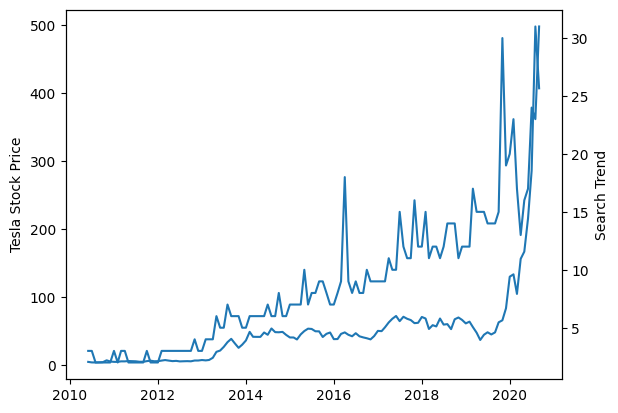

In [67]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Tesla Stock Price')
ax2.set_ylabel('Search Trend')
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

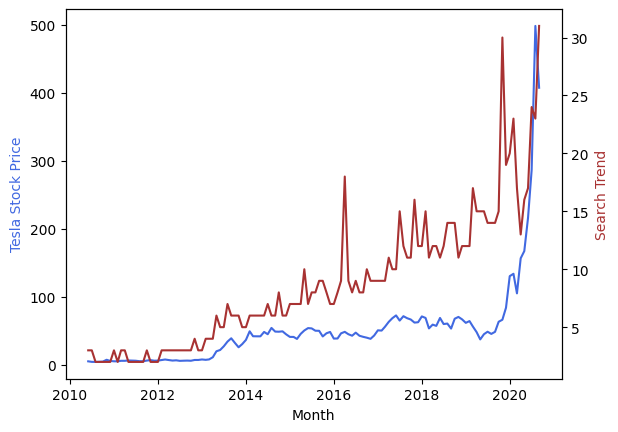

In [68]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('Month')
ax1.set_ylabel('Tesla Stock Price', color='royalblue')
ax2.set_ylabel('Search Trend', color='#a83232')
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='royalblue')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='#a83232')

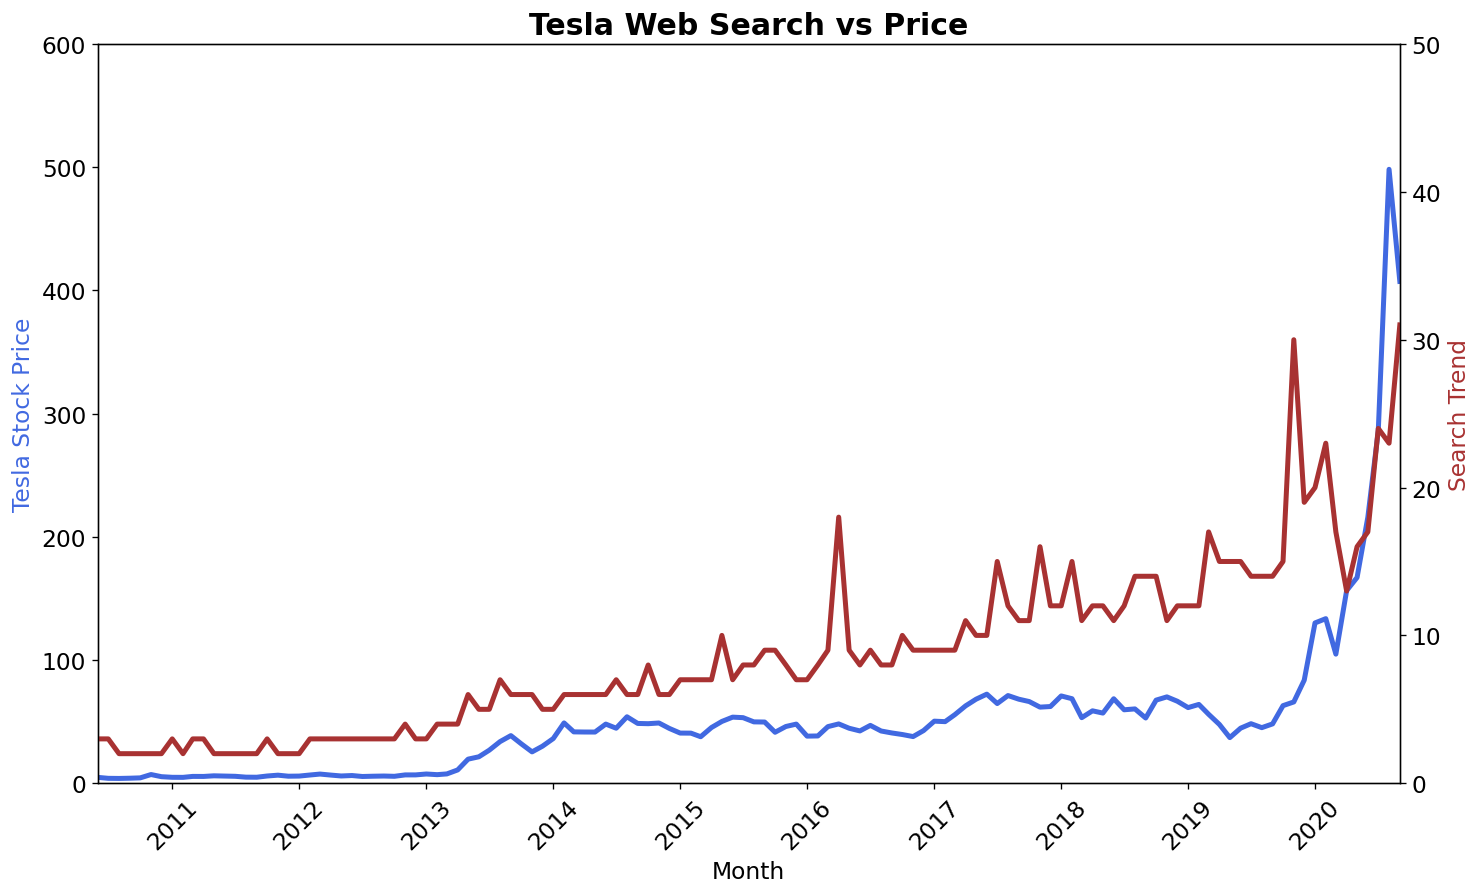

In [69]:
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Tesla Web Search vs Price', fontsize=18, fontweight='bold')

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Tesla Stock Price', color='royalblue', fontsize=14)
ax2.set_ylabel('Search Trend', color='#a83232', fontsize=14)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim([0,600])
ax2.set_ylim([0,50])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='royalblue', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='#a83232', linewidth=3)
plt.show()

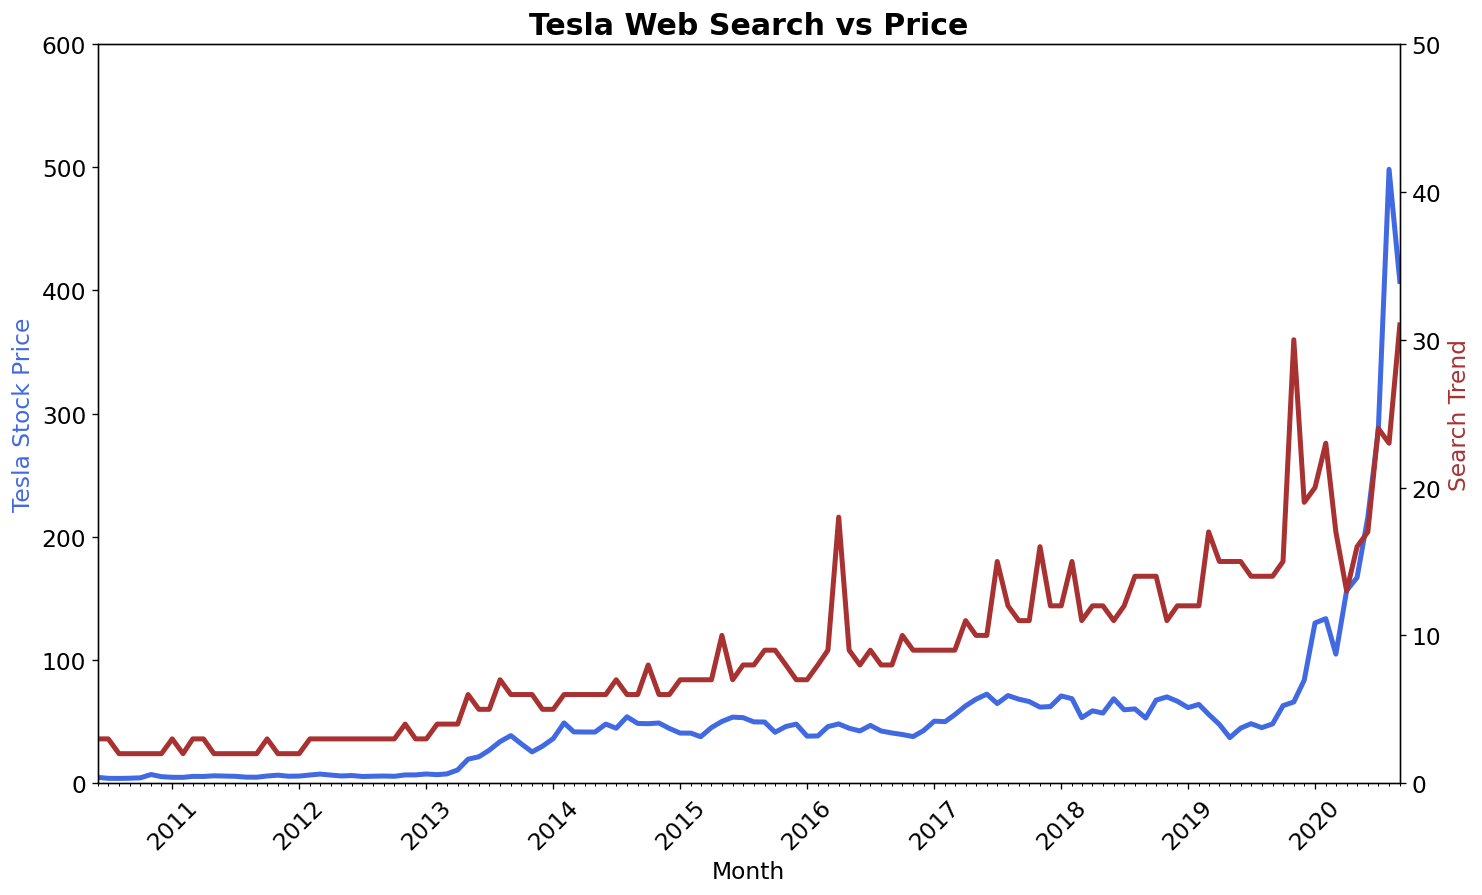

In [70]:
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Tesla Web Search vs Price', fontsize=18, fontweight='bold')

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Tesla Stock Price', color='royalblue', fontsize=14)
ax2.set_ylabel('Search Trend', color='#a83232', fontsize=14)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim([0,600])
ax2.set_ylim([0,50])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_frm)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='royalblue', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='#a83232', linewidth=3)
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

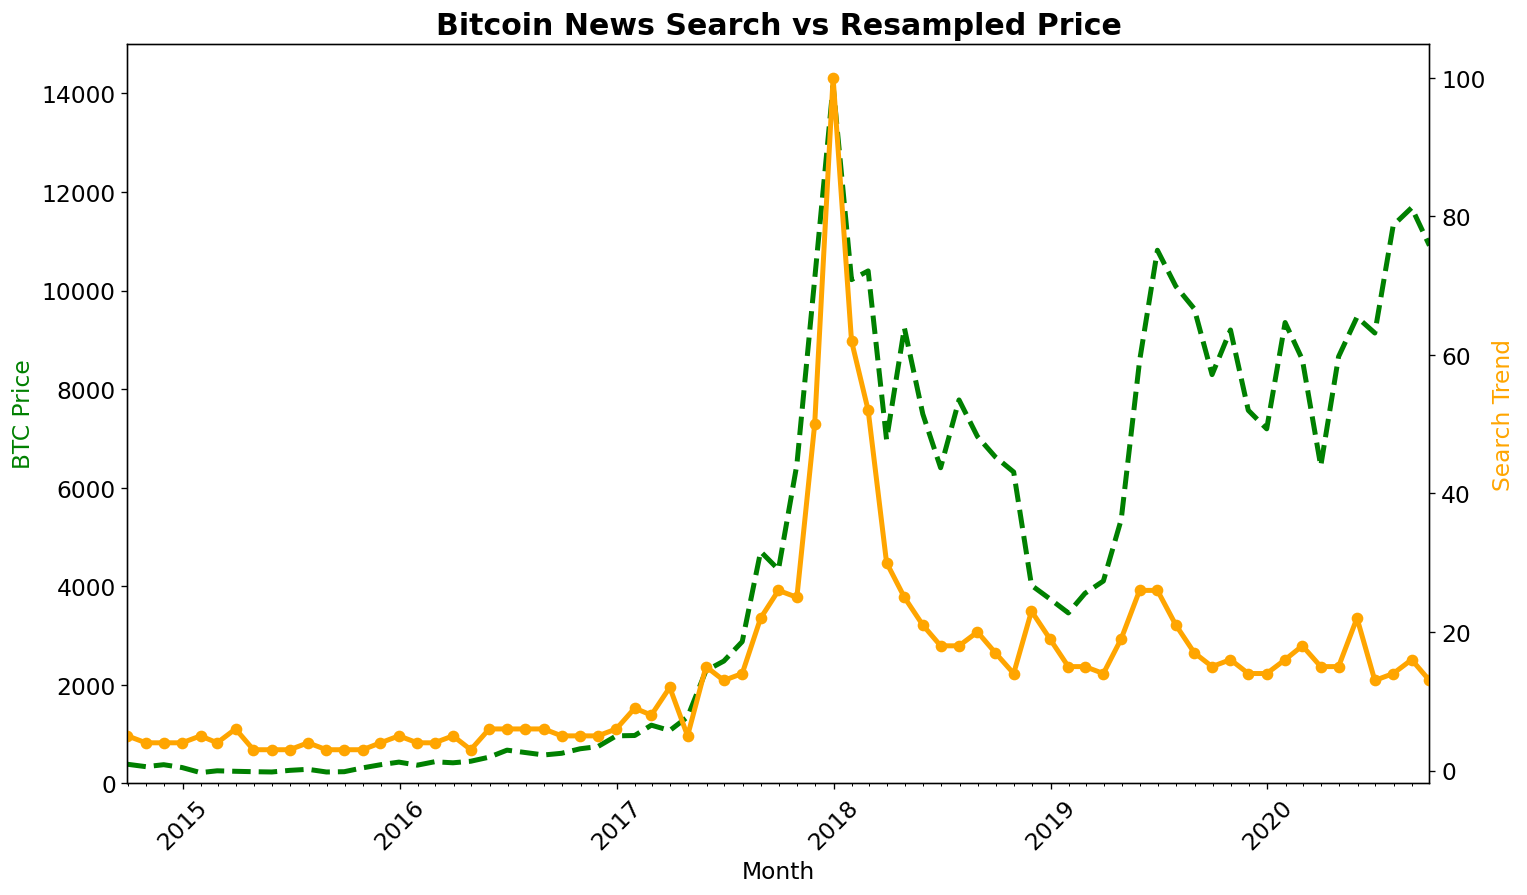

In [71]:
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18, fontweight='bold')

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('BTC Price', color='green', fontsize=14)
ax2.set_ylabel('Search Trend', color='orange', fontsize=14)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])


ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_frm)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='green', linewidth=3, linestyle='dashed')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='orange', linewidth=3, marker='o')
plt.show()

# **Observation**: The chart shows how at 2018 while search trend on BTC was high, it was associated with a high demanding on BTC so the price of BTC was high at the same time, interstingly the BTC price spike on mid 2019 was not associated with high seacrh trend on BTC, **Likely** beacuse BTC was well Known then and was at a lead postion in crypto domain.

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

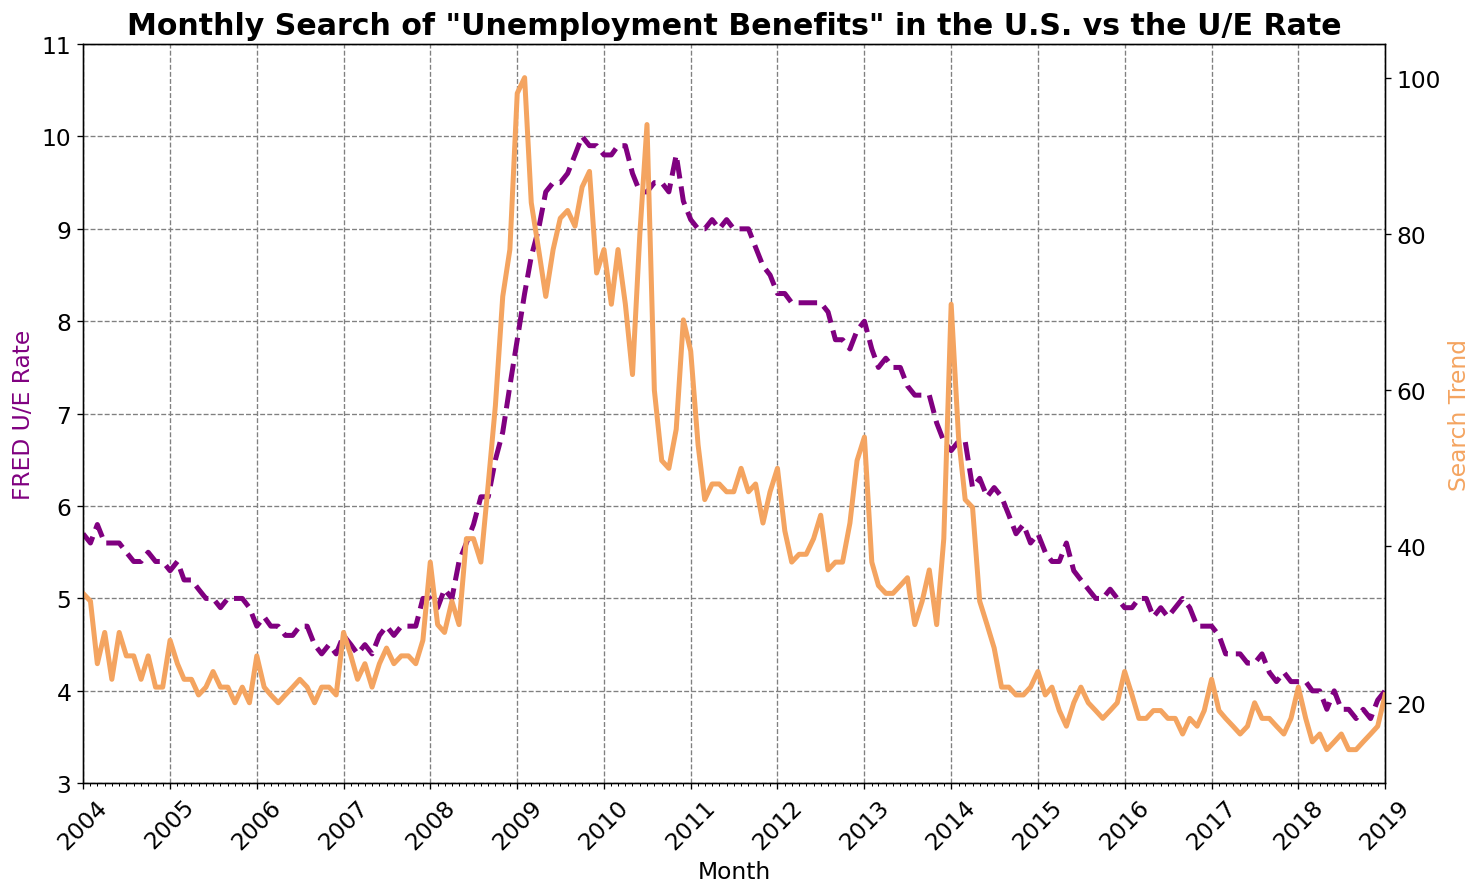

In [72]:
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18, fontweight='bold')
plt.grid(color='grey', linestyle='dashed')

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='sandybrown', fontsize=14)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1.set_ylim(bottom=3, top=11)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])


ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_frm)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='purple', linewidth=3, linestyle='dashed')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='sandybrown', linewidth=3)
plt.show()

# **Observation**: The chart shows how thr search trend for unemplyment has spikes around almost every end of year, indecates that there is seasonality in job market

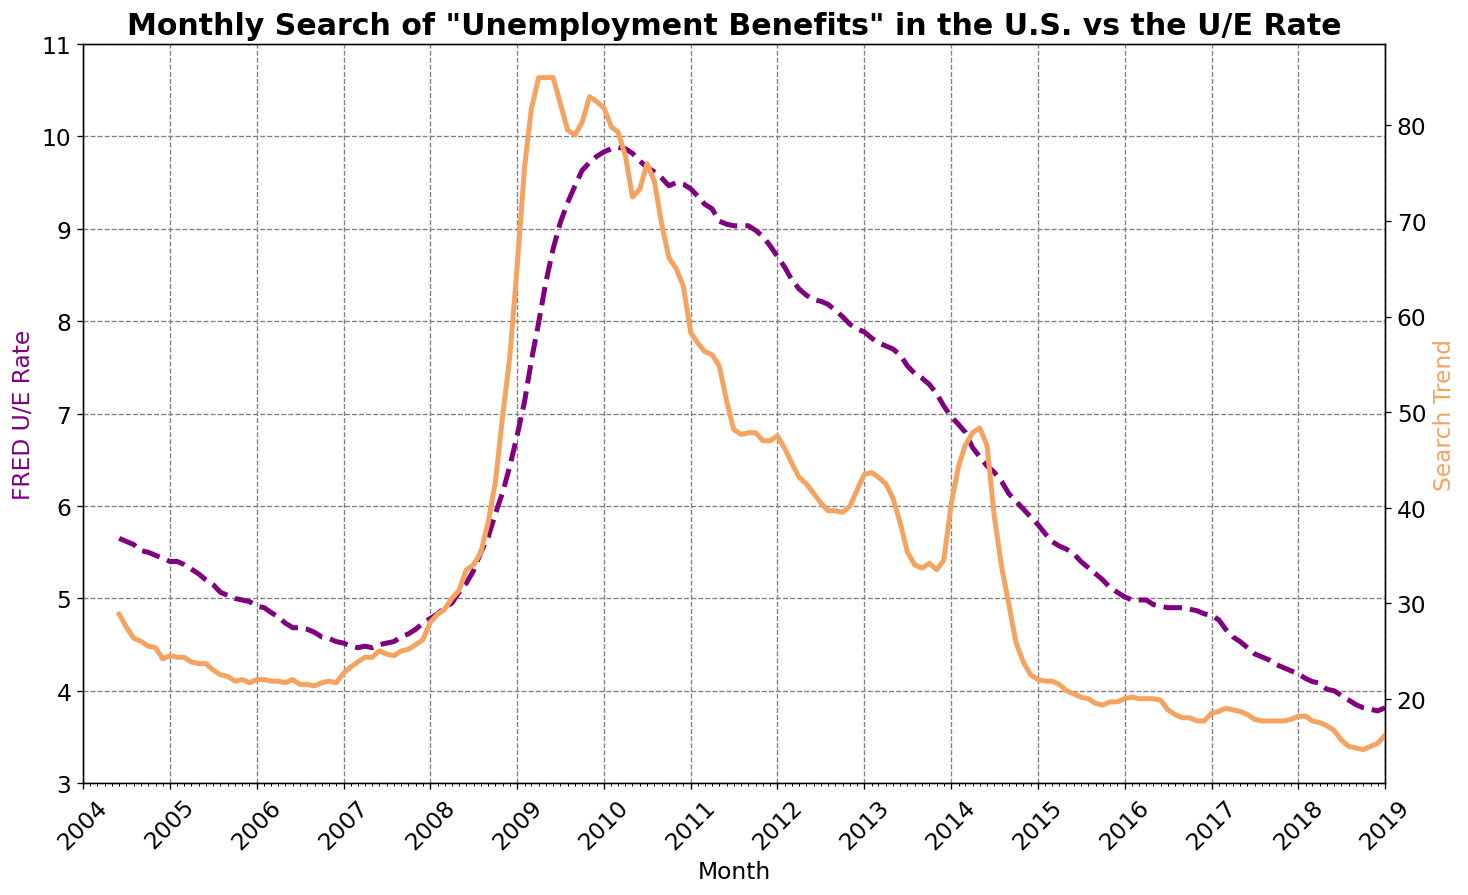

In [73]:
roll_un_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18, fontweight='bold')
plt.grid(color='grey', linestyle='dashed')

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='sandybrown', fontsize=14)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1.set_ylim(bottom=3, top=11)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])


ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_frm)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment.MONTH, roll_un_df.UNRATE, color='purple', linewidth=3, linestyle='dashed')
ax2.plot(df_unemployment.MONTH, roll_un_df.UE_BENEFITS_WEB_SEARCH, color='sandybrown', linewidth=3)
plt.show()

### Including 2020 in Unemployment Charts

In [74]:
df_new_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [75]:
df_new_unemployment.MONTH = pd.to_datetime(df_new_unemployment.MONTH)

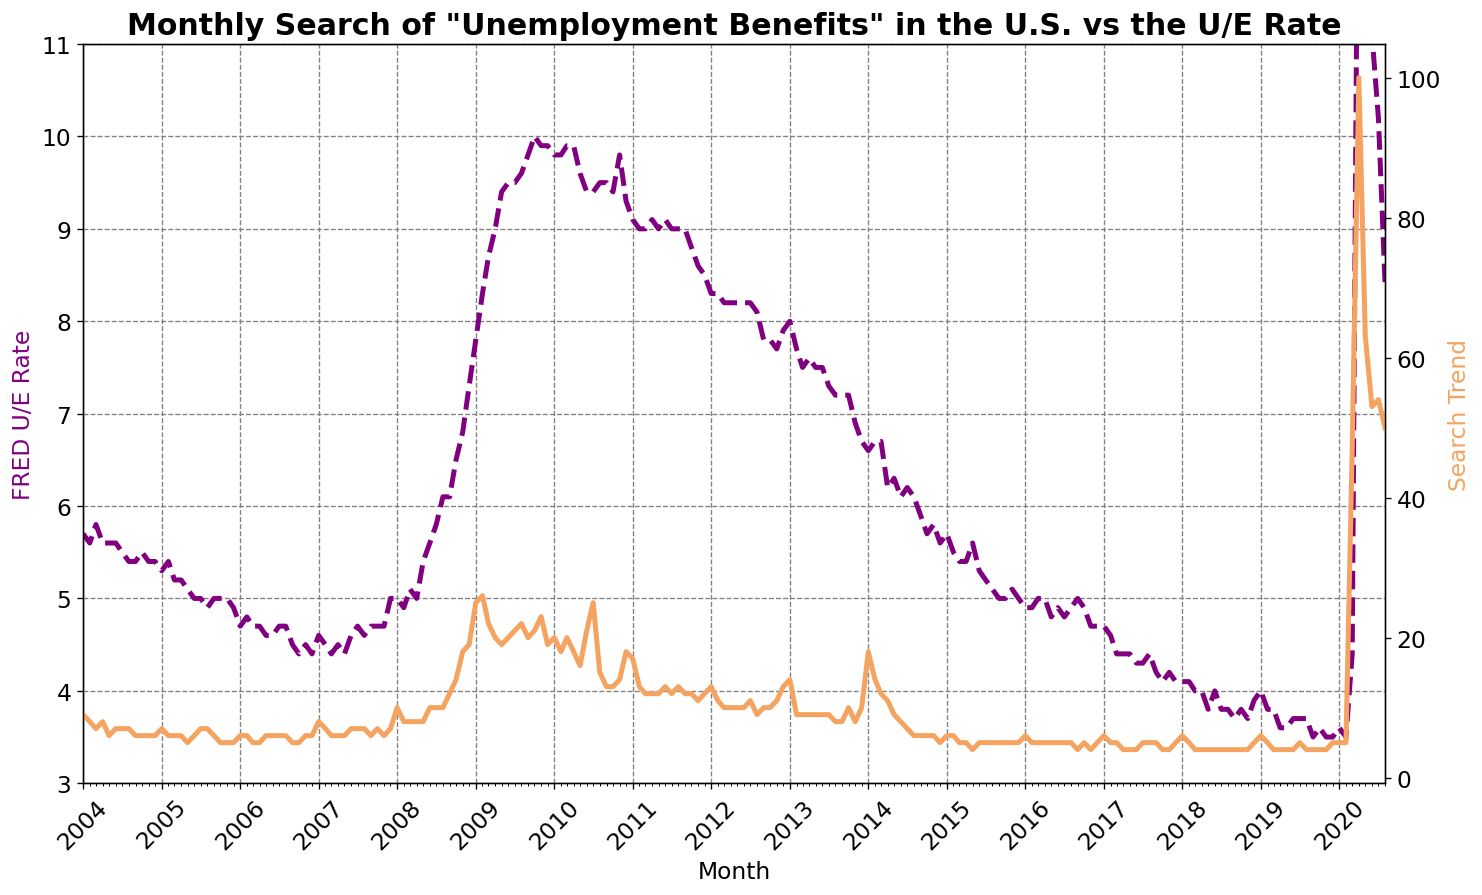

In [76]:
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18, fontweight='bold')
plt.grid(color='grey', linestyle='dashed')

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='sandybrown', fontsize=14)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1.set_ylim(bottom=3, top=11)
ax1.set_xlim([df_new_unemployment.MONTH.min(), df_new_unemployment.MONTH.max()])


ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_frm)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_new_unemployment.MONTH, df_new_unemployment.UNRATE, color='purple', linewidth=3, linestyle='dashed')
ax2.plot(df_new_unemployment.MONTH, df_new_unemployment.UE_BENEFITS_WEB_SEARCH, color='sandybrown', linewidth=3)
plt.show()

# **Observation**: the chart shows how the unemployment rate and search trend had a huge spike after 2020, **Likely** due to COVID-19 pandamic.